In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

idx  = pd.IndexSlice
% matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [17]:
##### 1 #### CREATION D'UNE DATAFRAME DE BASE AVEC INDEX NUMERIQUE PAR DEFAUT

my_df = pd.DataFrame([[0.1,10,20,220],[1,11,21,221],[2,12,22,222],[3,13,23,223],\
                       [0.1,10,20,220],[1,11,21,221],[2,12,22,222],[3,13,23,223]],\
                      index = [['GROWTH','GROWTH','GROWTH','GROWTH','EDUCATION','EDUCATION','EDUCATION','EDUCATION'],\
                               ['ind1','ind1','ind1','ind1','ind2','ind2','ind2','ind2'],\
                               ['indicateur1','indicateur1','indicateur1','indicateur1',\
                                'indicateur2','indicateur2','indicateur2','indicateur2'],\
                               ['Europe','Europe','Africa','Africa']*2,\
                               ['FRA','GER','ALG','TUN']*2,\
                               ['France','Germany','Algeria','Tunisia']*2],\
                              columns = ['1990', '1991', '1992', '1993'])

my_df3 = pd.DataFrame( {'Topic' : ['GROWTH','GROWTH','GROWTH','GROWTH','EDUCATION','EDUCATION','EDUCATION','EDUCATION'],\
                        'Indicator Code' : ['ind1','ind1','ind1','ind1','ind2','ind2','ind2','ind2'],\
                        'Indicator Name' : ['indicateur1','indicateur1','indicateur1','indicateur1',\
                                 'indicateur2','indicateur2','indicateur2','indicateur2'],\
                        'Region' : ['Europe','Europe','Africa','Africa']*2,\
                        'Country Name' : ['France','Germany','Algeria','Tunisia']*2,\
                        'Country Code' : ['FRA','GER','ALG','TUN']*2,\
                       })
my_df.reset_index(inplace = False)[my_df.columns]
my_df4 = pd.concat([my_df3, my_df.reset_index(inplace = False)[my_df.columns]], axis =1, ignore_index = False)
my_df4.head()

,Topic,Indicator Code,Indicator Name,Region,Country Name,Country Code,1990,1991,1992,1993
0,GROWTH,ind1,indicateur1,Europe,France,FRA,0.1,10,20,220
1,GROWTH,ind1,indicateur1,Europe,Germany,GER,1.0,11,21,221
2,GROWTH,ind1,indicateur1,Africa,Algeria,ALG,2.0,12,22,222
3,GROWTH,ind1,indicateur1,Africa,Tunisia,TUN,3.0,13,23,223
4,EDUCATION,ind2,indicateur2,Europe,France,FRA,0.1,10,20,220


In [18]:
##### 2 #### TRANSFORMATION DE COLONNES EN INDEXS
my_df4.set_index(['Topic', 'Indicator Code','Indicator Name', 'Region', 'Country Name', 'Country Code'], inplace = True)
my_df4.head()

1990  \
Topic     Indicator Code Indicator Name Region Country Name Country Code         
GROWTH    ind1           indicateur1    Europe France       FRA            0.1   
                                               Germany      GER            1.0   
                                        Africa Algeria      ALG            2.0   
                                               Tunisia      TUN            3.0   
EDUCATION ind2           indicateur2    Europe France       FRA            0.1   

                                                                          1991  \
Topic     Indicator Code Indicator Name Region Country Name Country Code         
GROWTH    ind1           indicateur1    Europe France       FRA             10   
                                               Germany      GER             11   
                                        Africa Algeria      ALG             12   
                                               Tunisia      TUN             13   
EDUCATION ind2           indicateur2    Europe France       FRA             10   

                                                                          1992  \
Topic     Indicator Code Indicator Name Region Country Name Country Code         
GROWTH    ind1           indicateur1    Europe France       FRA             20   
                                               Germany      GER             21   
                                        Africa Algeria      ALG             22   
                                               Tunisia      TUN             23   
EDUCATION ind2           indicateur2    Europe France       FRA             20   

                                                                          1993  
Topic     Indicator Code Indicator Name Region Country Name Country Code        
GROWTH    ind1           indicateur1    Europe France       FRA            220  
                                               Germany      GER            221  
                                        Africa Algeria      ALG            222  
                                               Tunisia      TUN            223  
EDUCATION ind2           indicateur2    Europe France       FRA            220

In [35]:
##### 3 #### PERMUTATION DES INDEX DE LIGNES ET DE COLONNES DE LA DATAFRAME
my_df5 = my_df4.copy(deep = True)
my_df5.columns = pd.MultiIndex.from_product([my_df4.columns, ['val']], names = ['Year', 'nom'])
my_df5.columns = my_df5.columns.swaplevel(0, 1)
my_df5.head()

nom                                                                       val  \
Year                                                                     1990   
Topic     Indicator Code Indicator Name Region Country Name Country Code        
GROWTH    ind1           indicateur1    Europe France       FRA           0.1   
                                               Germany      GER           1.0   
                                        Africa Algeria      ALG           2.0   
                                               Tunisia      TUN           3.0   
EDUCATION ind2           indicateur2    Europe France       FRA           0.1   

nom                                                                            \
Year                                                                     1991   
Topic     Indicator Code Indicator Name Region Country Name Country Code        
GROWTH    ind1           indicateur1    Europe France       FRA            10   
                                               Germany      GER            11   
                                        Africa Algeria      ALG            12   
                                               Tunisia      TUN            13   
EDUCATION ind2           indicateur2    Europe France       FRA            10   

nom                                                                            \
Year                                                                     1992   
Topic     Indicator Code Indicator Name Region Country Name Country Code        
GROWTH    ind1           indicateur1    Europe France       FRA            20   
                                               Germany      GER            21   
                                        Africa Algeria      ALG            22   
                                               Tunisia      TUN            23   
EDUCATION ind2           indicateur2    Europe France       FRA            20   

nom                                                                            
Year                                                                     1993  
Topic     Indicator Code Indicator Name Region Country Name Country Code       
GROWTH    ind1           indicateur1    Europe France       FRA           220  
                                               Germany      GER           221  
                                        Africa Algeria      ALG           222  
                                               Tunisia      TUN           223  
EDUCATION ind2           indicateur2    Europe France       FRA           220

In [36]:
#my_df5 = my_df5.unstack(['Topic', 'Indicator Code', 'Indicator Name']).stack('Year')
my_df5 = my_df5.stack('Year')
my_df5.head()

nom                                                                           val
Topic  Indicator Code Indicator Name Region Country Name Country Code Year       
GROWTH ind1           indicateur1    Europe France       FRA          1990    0.1
                                                                      1991   10.0
                                                                      1992   20.0
                                                                      1993  220.0
                                            Germany      GER          1990    1.0

In [ ]:
my_df5 = my_df5.unstack(['Topic', 'Indicator Code', 'Indicator Name'])
#my_df5.index = my_df5.index.swaplevel(0, 1)
my_df5.sort_index(inplace=True)
my_df5.columns = my_df5.columns.droplevel()
my_df5.T.dropna(how = 'all', inplace = False, axis = 0).T
my_df5.dropna(axis = 1, inplace = True)
my_df5.head()

In [90]:
my_df6 = my_df5.copy(deep = True)

In [91]:
my_df6.loc[('Africa', 'Algeria', 'ALG', '1992'),('GROWTH', 'ind1')] = np.nan
my_df6

Topic                                   EDUCATION      GROWTH
Indicator Code                               ind2        ind1
Indicator Name                        indicateur2 indicateur1
Region Country Name Country Code Year                        
Africa Algeria      ALG          1990         2.0         2.0
                                 1991        12.0        12.0
                                 1992        22.0         NaN
                                 1993       222.0       222.0
       Tunisia      TUN          1990         3.0         3.0
                                 1991        13.0        13.0
                                 1992        23.0        23.0
                                 1993       223.0       223.0
Europe France       FRA          1990         0.1         0.1
                                 1991        10.0        10.0
                                 1992        20.0        20.0
                                 1993       220.0       220.0
       Germany      GER          1990         1.0         1.0
                                 1991        11.0        11.0
                                 1992        21.0        21.0
                                 1993       221.0       221.0

In [120]:
my_df7 = my_df6.copy(deep = True)
#[(c1,c2,c3)][my_df6[(c1,c2,c3)].where(~np.isnan(my_df6[(c1,c2,c3)]))] = "null !"
my_df7.T

Region                                   Africa                                               Europe                                              
Country Name                            Algeria                    Tunisia                    France                    Germany                   
Country Code                                ALG                        TUN                       FRA                        GER                   
Year                                       1990  1991  1992   1993    1990  1991  1992   1993   1990  1991  1992   1993    1990  1991  1992   1993
Topic     Indicator Code Indicator Name                                                                                                           
EDUCATION ind2           indicateur2        2.0  12.0  22.0  222.0     3.0  13.0  23.0  223.0    0.1  10.0  20.0  220.0     1.0  11.0  21.0  221.0
GROWTH    ind1           indicateur1        2.0  12.0   NaN  222.0     3.0  13.0  23.0  223.0    0.1  10.0  20.0  220.0     1.0  11.0  21.0  221.0

In [128]:
#remplacer les Nan par 2022202, remplacer les non null par le double
# ('EDUCATION','ind2','indicateur2')  ('GROWTH','ind1','indicateur1')
tupl_ind = ('GROWTH','ind1','indicateur1')
dfc = (my_df7[tupl_ind] - my_df7[tupl_ind].mean())/my_df7[tupl_ind].std(ddof = 0)
dfc

Region  Country Name  Country Code  Year
Africa  Algeria       ALG           1990   -0.692878
                                    1991   -0.585964
                                    1992         NaN
                                    1993    1.659244
        Tunisia       TUN           1990   -0.682187
                                    1991   -0.575272
                                    1992   -0.468357
                                    1993    1.669936
Europe  France        FRA           1990   -0.713192
                                    1991   -0.607347
                                    1992   -0.500432
                                    1993    1.637861
        Germany       GER           1990   -0.703570
                                    1991   -0.596655
                                    1992   -0.489740
                                    1993    1.648553
Name: (GROWTH, ind1, indicateur1), dtype: float64

In [78]:
# df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
#                     'B': [5, 6, 7, 8, 9],
#                     'C': ['a', 'b', 'c', 'd', 'e']})
df.replace(np.nan, 5)

Topic                                   EDUCATION      GROWTH
Indicator Code                               ind2        ind1
Indicator Name                        indicateur2 indicateur1
Region Country Name Country Code Year                        
Africa Algeria      ALG          1990       400.0       400.0
                                 1991      2400.0      2400.0
                                 1992      4400.0         5.0
                                 1993         5.0         5.0
       Tunisia      TUN          1990       600.0       600.0
                                 1991      2600.0      2600.0
                                 1992      4600.0      4600.0
                                 1993         5.0         5.0
Europe France       FRA          1990         0.0         0.0
                                 1991      2000.0      2000.0
                                 1992      4000.0      4000.0
                                 1993         5.0         5.0
       Germany      GER          1990       200.0       200.0
                                 1991      2200.0      2200.0
                                 1992      4200.0      4200.0
                                 1993         5.0         5.0

In [41]:
for (c1,c2,c3) in my_df6.columns :
    if np.isnan(my_df6[(c1,c2,c3)]):
        my_df6_z[(c1,c2,c3)] = np.nan
    else :
        my_df6_z[(c1,c2,c3)] = (my_df6[(c1,c2,c3)] - my_df6[(c1,c2,c3)].mean()) / my_df6[(c1,c2,c3)].std(ddof=0)
my_df6_z.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [28]:
# somme de toutes les valeurs années par pays et pour un indicateur choisi
my_df6.groupby(level="Country Name").sum()["indicateur1"] 

Country Name
Algeria    258.0
France     250.0
Germany    254.0
Tunisia    262.0
Name: indicateur1, dtype: float64

In [ ]:
i=0
for year, new_df in my_df5.groupby(level=3):
    if i == 0 :
        coucou =new_df
coucou

for index in my_df5.index.get_level_values('Region') :
    print(index)
for col in my_df5.columns.get_level_values('Topic'):
    print(col)

# ##### 4 #### INTERROGATION DE LA DATAFRAME
# #slices...

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from random import *
print(string.printable[10:24])

abcdefghijklmn


In [42]:
tab = np.array([[let1+let2 for let1 in string.printable[10:24]]for let2 in string.printable[10:24]])
tab2 = np.random.randint(50,size=(14,14))
data = np.random.randint(5,size=(14,14))

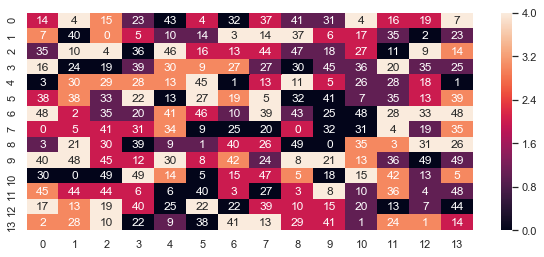

In [43]:
sns.set(font_scale=1.2)
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (10,4))
mask = np.zeros_like(data, dtype=np.bool) # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
kws = tab
ax = sns.heatmap(data, annot = tab2)
plt.show()

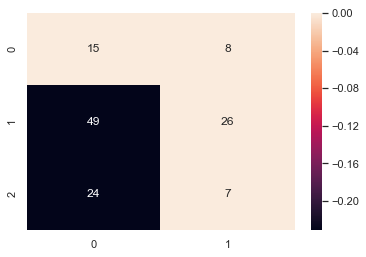

In [40]:
data = np.array([[0.000000,0.000000],[-0.231049,0.000000],[-0.231049,0.000000]])
labels =  np.array([[1,'B'],['C','D'],['E','F']])
labels2 = np.random.randint(50,size=(3,2))
fig, ax = plt.subplots()
ax = sns.heatmap(data, annot = labels2, fmt = '')
plt.show()

In [3]:
import pandas as pd

df1 = pd.DataFrame({
    'atable':     ['Users', 'Users', 'Domains', 'Domains', 'Locks'],
    'column':     ['col_1', 'col_2', 'col_a', 'col_b', 'col'],
    'column_type':['varchar', 'varchar', 'int', 'varchar', 'varchar'],
    'is_null':    ['No', 'No', 'Yes', 'No', 'Yes'],
})

df1.head()

,atable,column,column_type,is_null
0,Users,col_1,varchar,No
1,Users,col_2,varchar,No
2,Domains,col_a,int,Yes
3,Domains,col_b,varchar,No
4,Locks,col,varchar,Yes


In [16]:
df1_grouped = df1.groupby('atable')

# iterate over each group
for group_name, df_group in df1_grouped:
    print('nom du groupe : {}'.format(group_name))
    my_group = df_group
    my_name = group_name
    for row_index, row in df_group.iterrows():
        col = row['column']
#         is_null = 'NOT NULL' if row['is_null'] == 'NO' else ''
        print(col)
my_name

nom du groupe : Domains
col_a
col_b
nom du groupe : Locks
col
nom du groupe : Users
col_1
col_2


'Users'

In [2]:
df1_grouped = df1.groupby('atable')

# iterate over each group
for group_name, df_group in df1_grouped:
    print('\nCREATE TABLE {}('.format(group_name))

    for row_index, row in df_group.iterrows():
        col = row['column']
        column_type = row['column_type']
        is_null = 'NOT NULL' if row['is_null'] == 'NO' else ''
        print('\t{} {} {},'.format(col, column_type, is_null))

    print(");")

NameError: name 'df1' is not defined

In [5]:
import numpy as np
data = np.rec.array([
('Pat', 5),
('Pat', 4),
('Pat', 4),
('Pat', 3),
('Pat', 9),
('Pat', 4),
('Jack', 4),
('Jack', 8),
('Jack', 7),
('Jack', 5),
('Jack', 1),
('Jack', 5),
('Alex', 9),
('Alex', 8),
('Alex', 8),
('Alex', 10),
('Alex', 5),
('Alex', 10)], dtype = [('Archer','|U5'),('Score', '<i8')])
data

rec.array([('Pat',  5), ('Pat',  4), ('Pat',  4), ('Pat',  3),
           ('Pat',  9), ('Pat',  4), ('Jack',  4), ('Jack',  8),
           ('Jack',  7), ('Jack',  5), ('Jack',  1), ('Jack',  5),
           ('Alex',  9), ('Alex',  8), ('Alex',  8), ('Alex', 10),
           ('Alex',  5), ('Alex', 10)],
          dtype=[('Archer', '<U5'), ('Score', '<i8')])

In [37]:
fig8 = plt.figure(figsize=(18,3))

taille_classe = 16
montants = [[0,5.3,16,3.8,2,18.6], [10,5.3,16,30.8,2,186], [5.3,160,38,20,186], [0,5.3,16,3.8,2,18.6], [0,0.3,1.6,3.8,2,1.86]]
groupes = []
# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, 10, 20)
tranches += 1 # on décale les tranches d'une demi taille de classe

for i in range(5):
    g = {'valeurs': montants[i],'centre_classe': i*20,\
        'taille': len(montants[i]), 'quartiles': [np.percentile(montants[i],p) for p in [25,50,75]]}
    groupes.append(g)
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7, # largeur graphique des boxplots
            manage_xticks= False)
# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

NameError: name 'plt' is not defined